The idea was taken from
 Kaggle (https://www.kaggle.com/datasets/crawford/80-cereals) and proposed as an exercise in the AI ​​and Big Data Specialization Course of the IES Abastos for the Automatic Learning Systems subject.


# Cereal rating
If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again.

##Acknowledgements
These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found here (https://perso.telecom-paristech.fr/eagan/class/igr204/datasets)

This dataset has been converted to CSV

# Development

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv('cereal.csv')

In [135]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [137]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [138]:
nombre = df['name']

## Data preparation

### Attribute mfr

In [139]:
one_hot = pd.get_dummies(df.mfr, prefix='mfr')
one_hot.head()

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [140]:
df = df.drop('mfr', axis=1)
df = df.join(one_hot)
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,100% Bran,C,70,4,1,130,10.0,5.0,6,280,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,100% Natural Bran,C,120,3,5,15,2.0,8.0,8,135,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,All-Bran,C,70,4,1,260,9.0,7.0,5,320,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,Almond Delight,C,110,2,2,200,1.0,14.0,8,-1,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


### Attribute type

In [141]:
df['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [142]:
df['type'] = df['type'].map({'C': 0, 'H': 1})

In [143]:
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R
0,100% Bran,0,70,4,1,130,10.0,5.0,6,280,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,100% Natural Bran,0,120,3,5,15,2.0,8.0,8,135,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,All-Bran,0,70,4,1,260,9.0,7.0,5,320,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,All-Bran with Extra Fiber,0,50,4,0,140,14.0,8.0,0,330,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,Almond Delight,0,110,2,2,200,1.0,14.0,8,-1,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


## Model

### Correlation

In [144]:
correlation = df.corr(method='pearson', min_periods=1)

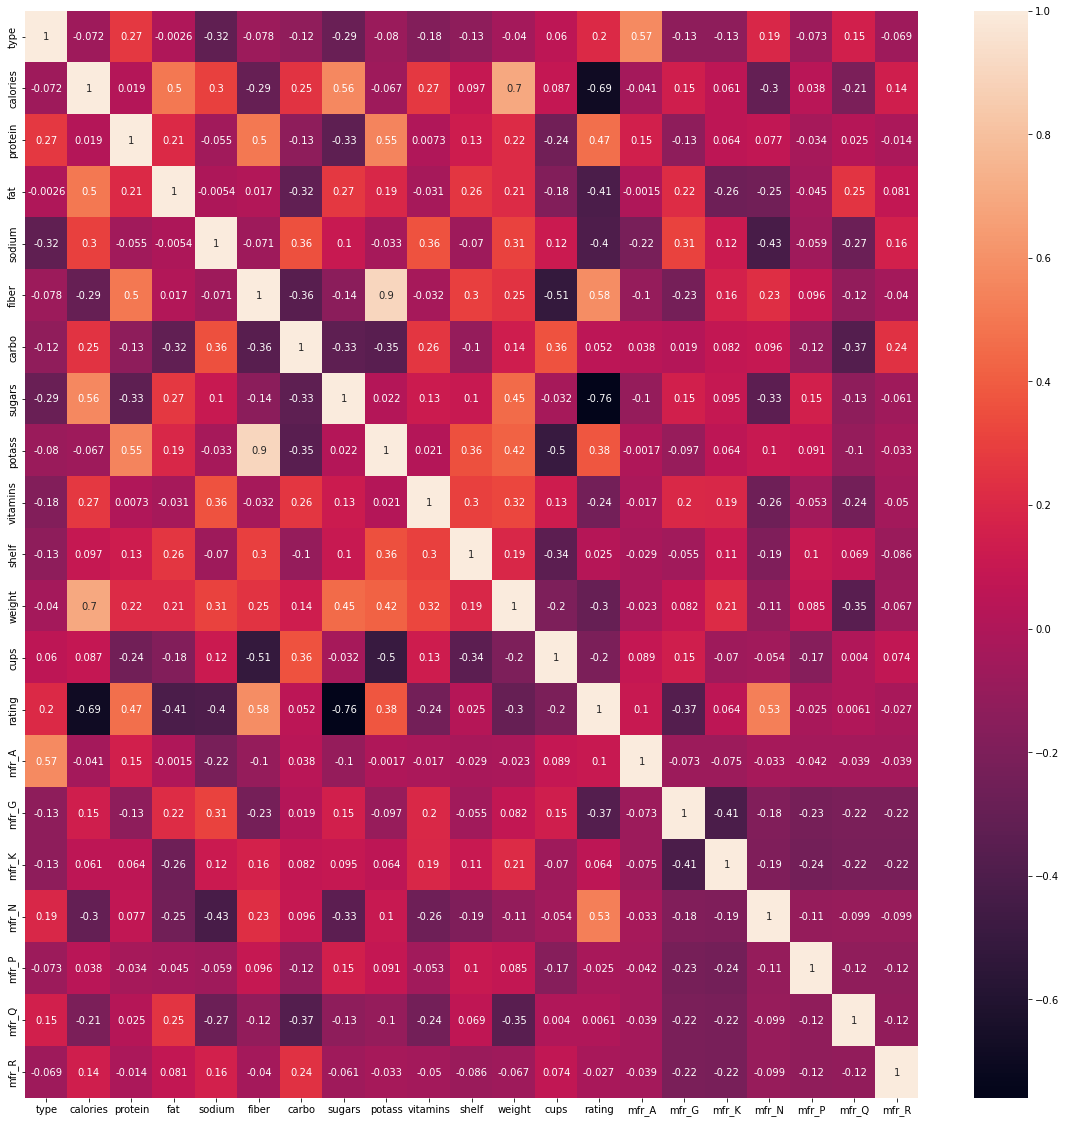

In [145]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation,annot=True)

In [146]:
cor_target = abs(correlation["rating"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
relevant_features

calories    0.689376
fiber       0.584160
sugars      0.759675
rating      1.000000
mfr_N       0.527063
Name: rating, dtype: float64

In [147]:
Y = df['rating']

In [148]:
#As we can see, the attributes that contribute the most to our target variable are: calories and sugars, fiber and mfr_N
#For this reason, we are going to use the most correlated variable and eliminate the rest to elaborate our model.
X = df.drop(columns=['calories', 'mfr_N', 'fiber', 'name'])


In [149]:
X.head()

,type,protein,fat,sodium,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_A,mfr_G,mfr_K,mfr_P,mfr_Q,mfr_R
0,0,4,1,130,5.0,6,280,25,3,1.0,0.33,68.402973,0,0,0,0,0,0
1,0,3,5,15,8.0,8,135,0,3,1.0,1.00,33.983679,0,0,0,0,1,0
2,0,4,1,260,7.0,5,320,25,3,1.0,0.33,59.425505,0,0,1,0,0,0
3,0,4,0,140,8.0,0,330,25,3,1.0,0.50,93.704912,0,0,1,0,0,0
4,0,2,2,200,14.0,8,-1,25,3,1.0,0.75,34.384843,0,0,0,0,0,1


## Data Scaling

In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [151]:
X_scaled

array([[0. , 0.6, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0.4, 1. , ..., 0. , 1. , 0. ],
       [0. , 0.6, 0.2, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0.4, 0.2, ..., 0. , 0. , 1. ],
       [0. , 0.4, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0.2, 0.2, ..., 0. , 0. , 0. ]])

## Creating the model


In [155]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.7)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Prediction

In [157]:
y_pred = model.predict(X_test)
y_pred

array([40.448772, 50.828392, 72.801787, 64.533816, 19.823573, 30.313351,
       52.076897, 35.782791, 21.871292, 53.131324, 40.400208, 68.235885,
       36.176196, 46.895644, 41.015492, 39.7034  , 29.509541, 28.592785,
       93.704912, 51.592193, 59.425505, 22.396513, 26.734515, 41.998933])

## Result and conclussions

In [158]:
model.score(X_test, y_test)

1.0

As we can see, we get overtrained score because we have much few data to feed our model. 